In [ ]:
!pip3 install adversarial-robustness-toolbox

from __future__ import absolute_import, division, print_function, unicode_literals

import os, sys
from os.path import abspath

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import warnings
warnings.filterwarnings('ignore')
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.get_logger().setLevel('ERROR')

from art.estimators.classification import KerasClassifier
from art.attacks.poisoning import PoisoningAttackBackdoor, PoisoningAttackCleanLabelBackdoor
from art.attacks.poisoning.perturbations import add_pattern_bd
from art.utils import load_mnist, preprocess, to_categorical
from art.defences.trainer import AdversarialTrainerMadryPGD


from art.estimators.classification.deep_partition_ensemble import DeepPartitionEnsemble

     |████████████████████████████████| 1.3 MB 3.7 MB/s 
     |████████████████████████████████| 3.3 MB 33.7 MB/s 
     |████████████████████████████████| 34.5 MB 12 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [ ]:
(x_raw, y_raw), (x_raw_test, y_raw_test), min_, max_ = load_mnist(raw=True)

# Random Selection:
n_train = np.shape(x_raw)[0]
num_selection = 10000
random_selection_indices = np.random.choice(n_train, num_selection)
x_raw = x_raw[random_selection_indices]
y_raw = y_raw[random_selection_indices]

# Poison training data
percent_poison = .33
x_train, y_train = preprocess(x_raw, y_raw)
x_train = np.expand_dims(x_train, axis=3)

x_test, y_test = preprocess(x_raw_test, y_raw_test)
x_test = np.expand_dims(x_test, axis=3)
  
# Shuffle training data
n_train = np.shape(y_train)[0]
shuffled_indices = np.arange(n_train)
np.random.shuffle(shuffled_indices)
x_train = x_train[shuffled_indices]
y_train = y_train[shuffled_indices]

In [ ]:
# Create Keras convolutional neural network - basic architecture from Keras examples
# Source here: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
def create_model():    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

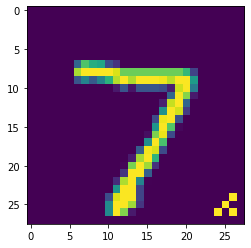

In [ ]:
backdoor = PoisoningAttackBackdoor(add_pattern_bd)
example_target = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
pdata, plabels = backdoor.poison(x_test, y=example_target)

plt.imshow(pdata[0].squeeze())

In [ ]:
# Poison some percentage of all non-nines to nines
targets = to_categorical([9], 10)[0] 

proxy = AdversarialTrainerMadryPGD(KerasClassifier(create_model()), nb_epochs=10, eps=0.15, eps_step=0.001)
proxy.fit(x_train, y_train)

Precompute adv samples:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial training epochs:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
backdoor = PoisoningAttackBackdoor(add_pattern_bd)
attack = PoisoningAttackCleanLabelBackdoor(backdoor=backdoor, proxy_classifier=proxy.get_classifier(),
                                           target=targets, pp_poison=percent_poison, norm=2, eps=5,
                                           eps_step=0.1, max_iter=200)
pdata, plabels = attack.poison(x_train, y_train)

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/200 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/200 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/200 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/200 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/200 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/200 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/200 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/200 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/200 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/200 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/200 [00:00<?, ?it/s]

1005


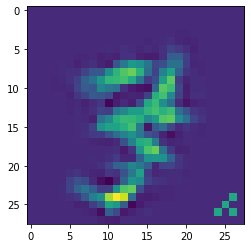

Index: 1 Label: 9


In [ ]:
poisoned = pdata[np.all(plabels == targets, axis=1)]
poisoned_labels = plabels[np.all(plabels == targets, axis=1)]
print(len(poisoned))
for i in range(len(poisoned)):
    if poisoned[i][0][0] != 0:
        plt.imshow(poisoned[i].squeeze())
        plt.show()
        print(f"Index: {i} Label: {np.argmax(poisoned_labels[i])}")
        break

In [ ]:
print(len(pdata))

10000


In [ ]:
print(len(plabels))

10000


In [ ]:
model = KerasClassifier(create_model())

In [ ]:
model.save('/content/mnist_badnet_normal.h5')

In [ ]:
model.fit(pdata, plabels, nb_epochs=10)

Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 2s 183us/sample - loss: 0.5063 - accuracy: 0.8425
Epoch 2/10
10000/10000 [==============================] - 2s 157us/sample - loss: 0.1424 - accuracy: 0.9578
Epoch 3/10
10000/10000 [==============================] - 2s 157us/sample - loss: 0.0895 - accuracy: 0.9732
Epoch 4/10
10000/10000 [==============================] - 2s 158us/sample - loss: 0.0575 - accuracy: 0.9825
Epoch 5/10
10000/10000 [==============================] - 2s 158us/sample - loss: 0.0400 - accuracy: 0.9871
Epoch 6/10
10000/10000 [==============================] - 2s 158us/sample - loss: 0.0337 - accuracy: 0.9899
Epoch 7/10
10000/10000 [==============================] - 2s 159us/sample - loss: 0.0282 - accuracy: 0.9917
Epoch 8/10
10000/10000 [==============================] - 2s 157us/sample - loss: 0.0218 - accuracy: 0.9942
Epoch 9/10
10000/10000 [==============================] - 2s 157us/sample - loss: 0.0164 - accuracy: 0.9941
Epoch


Poison test set accuracy (model): 0.00%


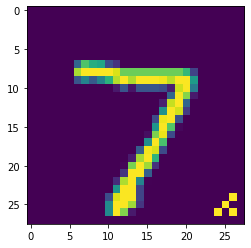

Prediction: 9


In [ ]:
not_target = np.logical_not(np.all(y_test == targets, axis=1))
px_test, py_test = backdoor.poison(x_test[not_target], y_test[not_target])

poison_preds = np.argmax(model.predict(px_test), axis=1)
clean_correct = np.sum(poison_preds == np.argmax(y_test[not_target], axis=1))
clean_total = y_test.shape[0]

clean_acc = clean_correct / clean_total
print("\nPoison test set accuracy (model): %.2f%%" % (clean_acc * 100))

c = 0 # index to display
plt.imshow(px_test[c].squeeze())
plt.show()
clean_label = c
print("Prediction: " + str(poison_preds[c]))

In [ ]:
warnings.filterwarnings('ignore')

from art import config
from art.utils import load_dataset, get_file
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import FastGradientMethod
from art.attacks.evasion import BasicIterativeMethod
from art.defences.trainer import AdversarialTrainer

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from art.attacks.evasion.projected_gradient_descent.projected_gradient_descent import ProjectedGradientDescent

robust_classifier = KerasClassifier(create_model())
attacks = ProjectedGradientDescent(robust_classifier, eps=0.3, eps_step=0.01, max_iter=40)
trainer = AdversarialTrainer(robust_classifier, attacks, ratio=1.0)
trainer.fit(pdata, plabels, nb_epochs=30, batch_size=250)

Precompute adv samples:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial training epochs:   0%|          | 0/30 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
robust_classifier.save('/content/mnist_badnet_at.h5')

10000

Poison test set accuracy (model): 93.70%


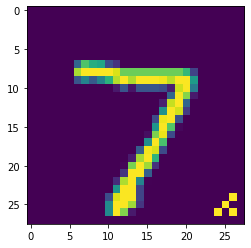

Prediction: 7


In [ ]:
not_target = np.logical_not(np.all(y_test == targets, axis=1))
px_test, py_test = backdoor.poison(x_test[not_target], y_test[not_target])
poison_preds = np.argmax(robust_classifier.predict(px_test), axis=1)
clean_correct = np.sum(poison_preds == np.argmax(y_test[not_target], axis=1))
clean_total = py_test.shape[0]
print(y_test.shape[0])
clean_acc = clean_correct / clean_total
print("\nPoison test set accuracy (model): %.2f%%" % (clean_acc * 100))

c = 0 # index to display
plt.imshow(px_test[c].squeeze())
plt.show()
clean_label = c
print("Prediction: " + str(poison_preds[c]))

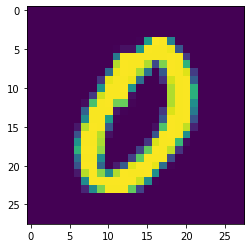

In [ ]:
plt.imshow(pdata[0].squeeze())

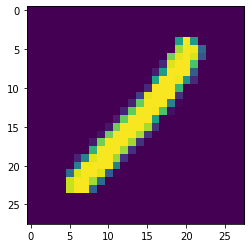

In [ ]:
plt.imshow(pdata[2].squeeze())

In [ ]:
poisoned = pdata[np.all(plabels == targets, axis=1)]

In [ ]:
for i in range(len(pdata)):
  if plabels[i][9]==1:
    print(i)

1
21
27
33
37
56
65
66
84
86
93
106
120
124
136
152
159
167
185
205
212
219
239
256
258
263
265
294
298
301
315
318
324
337
339
341
349
356
358
361
362
373
383
416
418
420
435
457
468
494
503
521
531
536
540
555
558
559
562
574
584
593
596
598
600
619
620
651
661
670
671
678
680
689
697
707
723
739
744
749
755
756
759
764
766
789
790
794
800
816
825
835
841
845
855
856
862
865
866
874
879
882
889
893
900
903
908
919
949
955
965
967
976
982
996
1005
1026
1027
1030
1047
1048
1061
1064
1066
1074
1088
1094
1120
1130
1153
1159
1165
1170
1187
1197
1200
1203
1211
1219
1234
1235
1254
1258
1259
1266
1285
1291
1302
1311
1319
1328
1335
1351
1370
1382
1394
1401
1417
1418
1425
1427
1428
1438
1440
1441
1453
1455
1459
1462
1464
1473
1476
1486
1512
1531
1562
1569
1616
1624
1631
1633
1650
1652
1662
1663
1666
1668
1678
1685
1686
1688
1703
1730
1739
1742
1751
1759
1768
1779
1780
1782
1786
1802
1808
1815
1822
1832
1844
1853
1858
1881
1896
1918
1919
1932
1975
1979
2005
2007
2017
2029
2032
2035
2048
2063
20